In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/wines.csv')

In [3]:
y = df['Class']

In [4]:
y_cat = pd.get_dummies(y)

In [5]:
X = df.drop('Class', axis=1)

In [6]:
X.shape

(178, 13)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xsc = sc.fit_transform(X)

C:\Users\oprea\Anaconda3\envs\ztdl\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\oprea\Anaconda3\envs\ztdl\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K

Using TensorFlow backend.


In [10]:
K.clear_session()
model = Sequential()
model.add(Dense(8, input_shape=(13,),
                kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(5, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.05),
              'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xsc, y_cat.values,
          batch_size=16,
          epochs=20,
          verbose=1)

Epoch 1/20
178/178 [==============================] - 1s 5ms/step - loss: 0.6289 - acc: 0.7584
Epoch 2/20
178/178 [==============================] - 0s 286us/step - loss: 0.2002 - acc: 0.9663
Epoch 3/20
178/178 [==============================] - 0s 315us/step - loss: 0.1087 - acc: 0.9888
Epoch 4/20
178/178 [==============================] - 0s 270us/step - loss: 0.0728 - acc: 0.9831
Epoch 5/20
178/178 [==============================] - 0s 225us/step - loss: 0.0412 - acc: 0.9944
Epoch 6/20
178/178 [==============================] - 0s 202us/step - loss: 0.0151 - acc: 1.0000
Epoch 7/20
178/178 [==============================] - 0s 202us/step - loss: 0.0087 - acc: 1.0000
Epoch 8/20
178/178 [==============================] - 0s 202us/step - loss: 0.0052 - acc: 1.0000
Epoch 9/20
178/178 [==============================] - 0s 225us/step - loss: 0.0032 - acc: 1.0000
Epoch 10/20
178/178 [==============================] - 0s 202us/step - loss: 0.0020 - acc: 1.0000
Epoch 11/20
178/178 [==========

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [12]:
inp = model.layers[0].input
out = model.layers[2].output

In [14]:
features_function = K.function([inp], [out])

In [15]:
features = features_function([Xsc])[0]

In [16]:
features.shape

(178, 2)

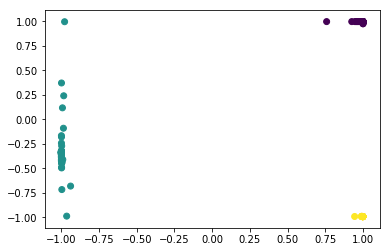

In [17]:
plt.scatter(features[:, 0], features[:, 1], c=y)